

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

>**The data I choose is  Medical Appointment  No Shows. The Dataset collects information from 100k medical appointments and is focused on the question of whether or not patients show up for their appointment by this question:**
> * Does the gender makes any difference in having patients for their Appointments ?
> * Does recieveing the SMS effect in having patients to Show / No-Show?
> * The average age of the patients ?

In [131]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame 
import csv

# to show the graphs : 
%matplotlib inline
sns.set()

#styling the background color 
sns.set(style="darkgrid")
sns.set(style="darkgrid", color_codes=True)




In [132]:
! pip install pandas

<a id='wrangling'></a>
## Data Wrangling


 
* Loading my data.
* Create summary  and see general information about the whole dataset.
* Checking the data if there's duplicated values or missing values .
* Cleaning the Data.


### General Properties

In [133]:
# Load my data and print out a few lines.
df = pd.read_csv('noshowappointments.csv')

In [134]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [135]:
df.shape

(110527, 14)

In [136]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [137]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [138]:
#check if there are duplicated data
df.duplicated().sum()

0

**We have 14 columns and there's no missing value so no need to removed any rows but we don't have to used them all too, also there are no duplicated columns**



In [139]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**The max age is 115 years and there's a mistake as we can see the min age is -1 year which dosn't make sence 
the mean age is 37 years**

##  Cleaning the data 

In [140]:
#cleaning the data 
def replaceAge(i):
    if i < 1:
        return df['Age'].median()
    else:
        return i
    
# here will move the all column to the function:
df['Age'] = df['Age'].apply(lambda a: replaceAge(a))

# to show if we clean the age mistake 
df[df['Age'] <= 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [141]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [142]:
# after seeing the data i've decided not use 'PatientId','AppointmentID' , 'AppointmentDay' ,'Neighbourhood' , Alcoholism so i've droped them

df.drop(['PatientId','AppointmentID' , 'AppointmentDay' ,'Neighbourhood' ,
                      'Alcoholism','ScheduledDay'] , axis = 1 , inplace=True)

In [143]:
#rename the columns
df.rename(columns = { 'No-show' : 'NoShow','Hipertension' : 'Hypertension', 'Handcap':'Handicap'}, inplace = True)

>  we have correct the wrong spelling

In [144]:
#this is the columns i wanna use so the data is ready now 
df.head(3)

,Gender,Age,Scholarship,Hypertension,Diabetes,Handicap,SMS_received,NoShow
0,F,62.0,0,1,0,0,0,No
1,M,56.0,0,0,0,0,0,No
2,F,62.0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



> **here we will visualize every questions by representing them in charts:**



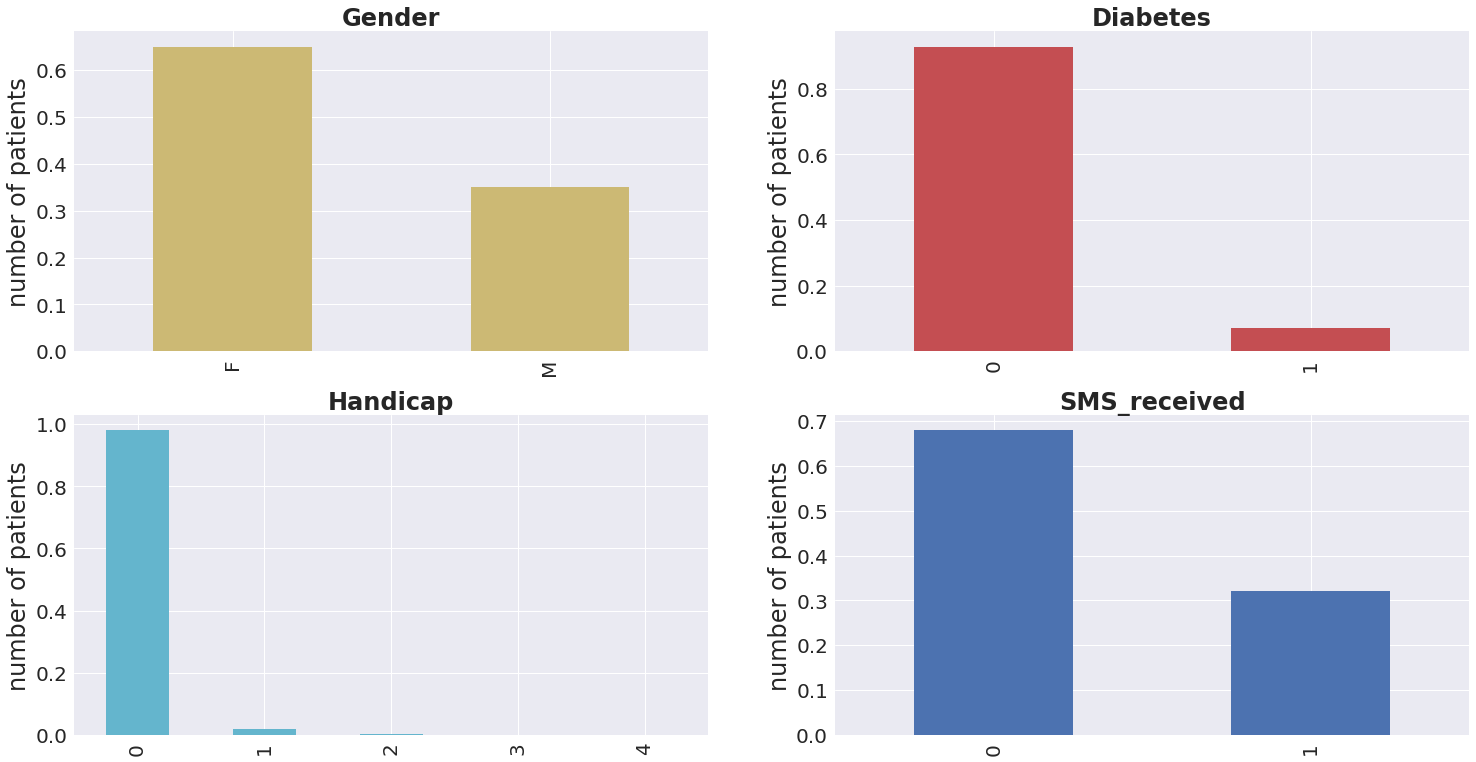

In [151]:
# standard figure size
plt.figure(figsize = (15,10))
cols = ['Gender' , 'Diabetes','Handicap','SMS_received']

colour = ['y', 'r' , 'c','b']
x = 0
for col in cols:    
    plt.subplot(int(str(32)+str((cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(25,20), fontsize = 20.0, color = colour[x])
    plt.title(col, fontweight="bold", fontsize = 24.0)
    plt.ylabel('number of patients', fontsize = 24.0)
    x = x +1

* Females goes to appointments more than males
* Only half of the patients received SMS!
* Around 10% of Patients are suffer from Diabetes and  Handicap


 ## Research Question 1: 
 ### Does the gender makes any difference in having patients for their Appointments  ?

In [152]:
df.groupby(['NoShow']).Gender.value_counts(normalize=True) .unstack('NoShow')

NoShow,No,Yes
Gender,,
F,0.648989,0.653882
M,0.351011,0.346118


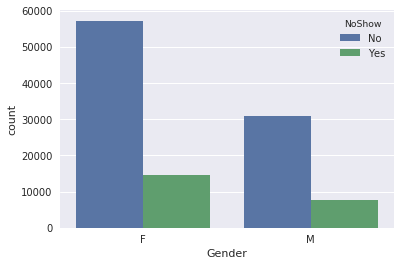

In [153]:
sns.countplot(x='Gender', hue='NoShow', data=df)
plt.show();

* As we can see the females show to their appointments more than males 
* also females No showing to their appointments more than males 
* So at the end there's no clear difference in having the status with Show or NoShow and gender has no effect 


## Research Question 2  
### (Does recieveing the SMS effect in having patients to Show / No-Show?  )

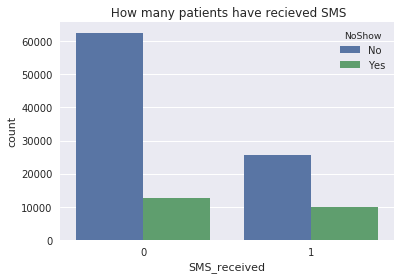

In [154]:
sns.countplot(x='SMS_received', hue = 'NoShow', data = df )
plt.title(' How many patients have recieved SMS');

* people who don/t received SMS show to their appointments more than who received SMS which is so strange !


## Research Question 2  
### The average age of the patients ?

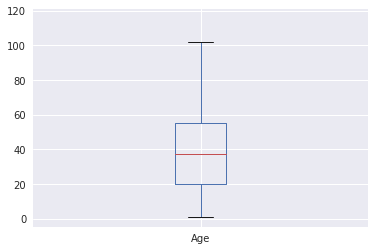

In [155]:
df['Age'].plot(kind='box')


* the minimum ages shows in months so which tell us we have baby record
* The max age is around 100 years
* 50% of patients are nearly 38 years  and above.

<a id='conclusions'></a>
## Conclusions
* Female recorders more then male recorders 
* Female show to their appointments more than male 
* Most of patients don't suffer from diseases or Handicap
* Most of patients don't received SMS but they show  unlike the patients who  received
* the median avrg of the age was aroun 38 and above 

## limitations in this project 
* The data contained variables object and it was difficult to me cuz there wasn't numerical values which I used to work on.
* I wasn't know how to use boxplot 




In [156]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## THANK YOU